# Deep Learning with Lasagne: The Force Awakens 
![alt text](../images/boardgame.jpg)

![alt text](../images/deeplearning.jpg "dl")

#  Let's classify the type of ship that appears in the image!

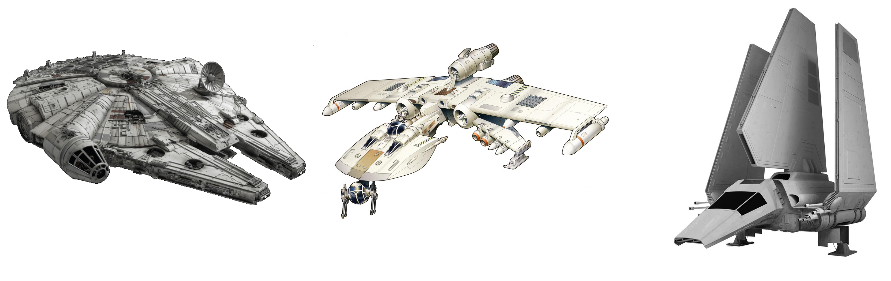

In [1]:
from IPython.display import Image
Image(filename='../images/ships.png') 

## How does our input data looks like?
![alt text](../images/dataset.png)

## Loading our images to a Pandas Dataframe

In [11]:
import os
import pandas as pd
import cv2

In [3]:
def images_to_file(path_to_photos):
    """
    Load images from folder and create a csv file with 
    X = pixel array and y = type of ship
    """
    ids = [os.path.splitext(image_id)[0] for image_id in os.listdir(path_to_photos)]
    df_out = pd.DataFrame(columns=['Image', 'Model', 'Model_enc'], index=ids)
    for image_file in os.listdir(path_to_photos):
            image = cv2.imread(os.path.join(path_to_photos, image_file), 0)
            df_out['Image'][os.path.splitext(image_file)[0]] = ' '.join(map(str, image.flatten()))
            df_out['Model'][os.path.splitext(image_file)[0]] = image_file.split('_')[0]
       
    catenc = pd.factorize(df_out['Model'])
    df_out['Model_enc'] = catenc[0]
    print(catenc)
    df_out.to_csv('../star_wars_data.csv')
    
    return df_out

In [4]:
images_to_file("../data/all/")

(array([0, 1, 0, ..., 2, 2, 2]), Index(['kwing', 'falcon', 'lambda'], dtype='object'))


,Image,Model,Model_enc
kwing_0000314,247 248 249 250 251 252 252 252 255 255 254 25...,kwing,0
falcon__81,106 106 112 54 4 7 3 6 4 4 4 2 1 1 2 3 4 4 4 4...,falcon,1
kwing_00117,71 65 63 67 63 55 77 76 86 87 83 76 86 87 92 8...,kwing,0
lambda_@198,163 164 164 165 166 166 166 166 165 165 164 16...,lambda,2
lambda_#34,87 88 89 90 91 92 94 95 95 94 94 95 94 92 91 9...,lambda,2
falcon_151,12 5 6 5 4 3 1 3 0 3 4 4 4 25 63 29 9 14 6 11 ...,falcon,1
lambda_008,117 120 118 110 105 103 107 114 135 143 151 15...,lambda,2
kwing_0000278,236 236 236 235 235 234 233 232 234 232 231 23...,kwing,0
lambda_478,112 112 116 122 126 126 124 124 122 122 120 11...,lambda,2
lambda_0038,46 40 25 21 25 22 18 16 16 14 13 19 23 56 105 ...,lambda,2


### How does the file we generate look like?

In [5]:
!head ../star_wars_data.csv

,Image,Model,Model_enc
kwing_0000314,247 248 249 250 251 252 252 252 255 255 254 254 254 255 255 255 244 221 207 209 209 208 209 207 209 207 205 205 204 203 200 198 198 197 195 194 195 195 195 195 192 191 191 190 188 186 184 183 184 184 170 180 180 174 171 172 170 170 170 169 169 169 168 168 167 167 168 168 168 168 168 168 169 168 166 164 162 161 161 161 158 158 158 159 159 160 161 162 164 162 160 161 161 160 156 153 151 149 147 147 145 144 145 148 152 153 152 150 150 151 151 150 149 148 147 146 145 144 141 140 141 142 141 136 132 135 136 132 246 247 248 250 251 251 252 252 255 254 254 254 254 254 254 255 242 220 207 209 209 207 208 206 207 206 204 203 203 202 200 198 198 197 196 195 195 196 196 195 193 193 192 190 189 186 184 183 181 179 176 173 169 173 172 172 170 170 170 170 169 169 169 169 169 169 169 169 169 168 167 166 167 166 164 163 162 162 161 162 160 160 160 160 160 161 161 162 163 161 160 160 161 159 156 153 148 147 146 146 146 146 148 151 152 153 153 151 151 152 152 150 148

### Now to format the input data for our network ...

In [17]:
import numpy as np
from sklearn.utils import shuffle

Starting to classify...
Starting to classify...
Starting to classify...


In [7]:
def load(images_dir="../data/all/", star_wars_fn='../star_wars_data.csv'):
    """
    Load images and target class for Falcon,
    Lambda and K-wing ships.
    """
    
    if os.path.exists(star_wars_fn):
        df = pd.read_csv(star_wars_fn)
    else:
        df = images_to_file(images_dir)
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    X = np.vstack(df['Image'].values) / 255.
    X = X.astype(np.float32)

    y = df['Model_enc'].values
    X, y = shuffle(X, y, random_state=42)
    y = y.astype(np.int32)
    
    return X, y

### What do we need to build our net ?

In [10]:
import warnings; warnings.simplefilter('ignore')
import theano
import lasagne
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,\
                           MaxPool2DLayer, DenseLayer
from lasagne.objectives import categorical_crossentropy
from nolearn.lasagne import BatchIterator

### How can we define the architecture of our network?

In [9]:
layers_1 = [
    # layer dealing with the input data
    (InputLayer, {'shape': (None, 1, 128, 128)}),
    
    # first stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 8, 'filter_size': 3,
     'W': lasagne.init.GlorotUniform()}),
    (MaxPool2DLayer, {'pool_size': 2}),

    # second stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 8, 'filter_size': 3,
     'W': lasagne.init.GlorotUniform()}),
    (MaxPool2DLayer, {'pool_size': 2}),
    
    # third stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 8, 'filter_size': 3,
     'W': lasagne.init.GlorotUniform()}),
    (MaxPool2DLayer, {'pool_size': 2}),
    
    # fourth stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 16, 'filter_size': 3,
     'W': lasagne.init.GlorotUniform()}),
    (MaxPool2DLayer, {'pool_size': 2}),
    
    # two dense layers with dropout
    (DenseLayer, {'num_units': 64}),
    (DropoutLayer, {}),
    (DenseLayer, {'num_units': 64}),
    
    # the output layer
    (DenseLayer, {'num_units': 3, 
     'nonlinearity': lasagne.nonlinearities.softmax}),
]

In [10]:
def create_net(max_epochs=100):
    return NeuralNet(
        layers=layers_1,
        update=nesterov_momentum,
        update_learning_rate=theano.shared(np.float32(0.01)),
        #update_momentum=theano.shared(np.float32(0.9)),
        regression=False,
        #objective_loss_function=categorical_crossentropy,
        #batch_iterator_train=RotationBatchIterator(batch_size=512),
        #on_epoch_finished=[
        #    AdjustVariable('update_learning_rate', start=0.01, stop=0.001),
        #    AdjustVariable('update_momentum', start=0.9, stop=0.9999)
        #],
        max_epochs=max_epochs,
        verbose=1)

### Some Hyperparameter Tuning

Some things that you want to tune:
 - Net structure
 - learning rate
 - W initialization
 - Regularization
 

![alt text](../images/split.png "http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full")
Image from [Deep learning for computational biology](http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full)

[Practical Recommendations for Gradient-Based Training of Deep Architectures - Yoshua Bengio](https://arxiv.org/pdf/1206.5533v2.pdf)

In [11]:
from sklearn.cross_validation import train_test_split
x, y = load("../data/all")
x = x.reshape(-1, 1, 128, 128)
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42)
print(X_train.shape)

(2591, 1, 128, 128)


In [12]:
net = create_net(20)
net.fit(X_train, y_train)

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


# Neural Network with 43699 learnable parameters

## Layer information

  #  name        size
---  ----------  ---------
  0  input0      1x128x128
  1  conv2d1     8x126x126
  2  maxpool2d2  8x63x63
  3  conv2d3     8x61x61
  4  maxpool2d4  8x30x30
  5  conv2d5     8x28x28
  6  maxpool2d6  8x14x14
  7  conv2d7     16x12x12
  8  maxpool2d8  16x6x6
  9  dense9      64
 10  dropout10   64
 11  dense11     64
 12  dense12     3

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  ------
      1     1.10053     1.09699    1.00323      0.35962  13.50s
      2     1.09676     1.09403    1.00249      0.37308  15.74s
      3     1.09331     1.08987    1.00316      0.45769  15.81s
      4     1.09199     1.08372    1.00763      0.50962  15.63s
      5     1.08419     1.07250    1.01091      0.52308  15.89s
      6     1.07270     1.05285    1.01886      0.46154  15.69s
      7     1.05307     1.02354    1.02886      0.47308  15.5

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f0f07e4b828>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7f0f07e4b7f0>,
     check_input=True, custom_scores=None,
     layers=[(<class 'lasagne.layers.input.InputLayer'>, {'shape': (None, 1, 128, 128)}), (<class 'lasagne.layers.conv.Conv2DLayer'>, {'num_filters': 8, 'filter_size': 3, 'W': <lasagne.init.GlorotUniform object at 0x7f0ef6304208>}), (<class 'lasagne.layers.pool.MaxPool2DLayer'>, {'pool_size': 2}), (<clas....layers.dense.DenseLayer'>, {'num_units': 3, 'nonlinearity': <function softmax at 0x7f0f087de6a8>})],
     loss=None, max_epochs=20, more_params={},
     objective=<function objective at 0x7f0f079b97b8>,
     objective_loss_function=<function categorical_crossentropy at 0x7f0f07f4b510>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog object at 0x7f0f079b87b8>],
     on_training_finished=[],
     on_tr

## How can we test our net?

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nolearn.lasagne import visualize

In [14]:
print(classification_report(y_test, net.predict(X_test)))

             precision    recall  f1-score   support

          0       0.93      0.98      0.96       362
          1       0.95      0.94      0.95       381
          2       0.99      0.95      0.97       368

avg / total       0.96      0.96      0.96      1111



In [8]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Taking a look at our *learning rate*


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.4/dist-packages/matplotlib/pyplot.py'>

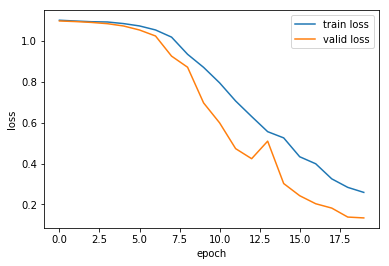

In [16]:
%matplotlib inline
visualize.plot_loss(net)

### How did our trained network do while classifying new ships?

In [17]:
def plot_matrix(clf, X_test, y_test):
    """
    Plot Confussion Matrix from a given classifier
    """
   
    plt.clf()
    
    cm = confusion_matrix(y_test, clf.predict(X_test))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    cm_normalized[np.isnan(cm_normalized)] = 0.0
    print(cm_normalized)
    plt.tick_params(labelsize=20)

    ax = plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    cb = plt.colorbar()
    cb.ax.tick_params(axis='both', labelsize=20)
    plt.ylabel("True label", fontsize=20)
    plt.xlabel("Predicted label", fontsize=20)
    plt.xticks(range(3),range(3))
    plt.yticks(range(3),range(3))



Normalized confusion matrix
[[ 0.97790055  0.01657459  0.00552486]
 [ 0.04986877  0.94488189  0.00524934]
 [ 0.01630435  0.0298913   0.95380435]]
[[354   6   2]
 [ 19 360   2]
 [  6  11 351]]


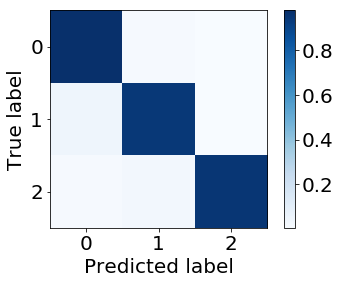

In [18]:
plot_matrix(net, X_test, y_test)
print(confusion_matrix(y_test, net.predict(X_test)))

### Do I have to train my network every time I want to use it ??
![alt text](../images/pickle.jpg)

In [1]:
import sys
import pickle
sys.setrecursionlimit(1000000)

In [2]:
import os.path

PICKLE_FILE = '../data/ship_classifier.pickle'

if os.path.isfile(PICKLE_FILE):
    # We have run this notebook before and have a pickle stored!
    print("Yay, pickle found!")
    net = None
    with open(PICKLE_FILE, 'rb') as f:
        net = pickle.load(f)
else:
    with open(PICKLE_FILE, 'wb') as f:
        pickle.dump(net, f, -1)

Yay, pickle found!


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

WARNING (theano.sandbox.cuda): CUDA is installed, but device gpu0 is not available  (error: Unable to get the number of gpus available: CUDA driver version is insufficient for CUDA runtime version)
WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


In [4]:
from nolearn.lasagne import PrintLayerInfo
layer_info = PrintLayerInfo()

net.verbose = 1
net.initialize()
layer_info(net)

# Neural Network with 43699 learnable parameters

## Layer information

  #  name        size
---  ----------  ---------
  0  input0      1x128x128
  1  conv2d1     8x126x126
  2  maxpool2d2  8x63x63
  3  conv2d3     8x61x61
  4  maxpool2d4  8x30x30
  5  conv2d5     8x28x28
  6  maxpool2d6  8x14x14
  7  conv2d7     16x12x12
  8  maxpool2d8  16x6x6
  9  dense9      64
 10  dropout10   64
 11  dense11     64
 12  dense12     3



### What happens inside the network?

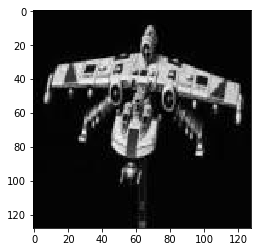

In [23]:
%matplotlib inline

my_image = cv2.imread("../data/kwing.jpg", 0)
plt.imshow(my_image, cmap='gray')
X = np.vstack(my_image) / 255.
plt.imshow(X, cmap='gray')
X = X.astype(np.float32)
X = X.reshape(-1, 1, 128, 128)

In [25]:
net.predict(X)

array([0])

### How sure is my network that I identify?

In [26]:
proba = net.predict_proba(X)
proba, proba.sum()

(array([[  9.64772940e-01,   3.47000286e-02,   5.27055061e-04]], dtype=float32),
 1.0)

In [27]:
proba[0, np.argmax(proba)]

0.96477294

#### What happens if we cover parts of our image? Which parts are important for classification?

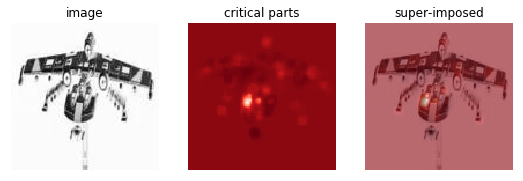

In [28]:
h = visualize.plot_occlusion(net, X, [2])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.4/dist-packages/matplotlib/pyplot.py'>

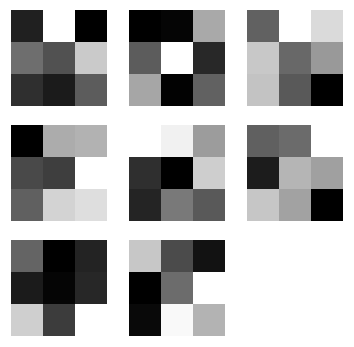

In [29]:
visualize.plot_conv_weights(net.layers_[1])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.4/dist-packages/matplotlib/pyplot.py'>

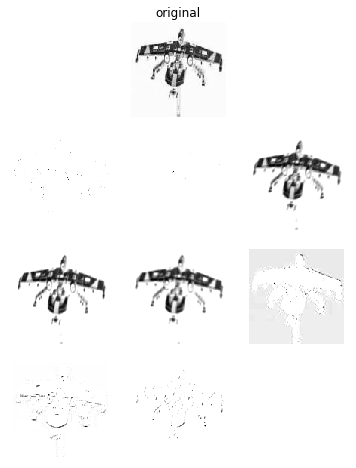

In [30]:
visualize.plot_conv_activity(net.layers_['conv2d1'], X)

In [33]:
from nolearn.lasagne.visualize import draw_to_notebook

draw_to_notebook(net)

ImportError: No module named 'pydotplus'

### Now let's connect our notebook to Anvil!

In [5]:
import anvil.server

anvil.server.connect("U6NAYEXT5LLE5UGGUPZIKYCQ-FNICZ2KNQWPL5HXD")  # our Ship Classifer app

Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK


In [7]:
import anvil.media
import cv2
import numpy as np

tipos_naves = {0: 'K-Wing', 1: 'Falcon', 2: 'Lambda'}

def format_net(my_image):
        X = np.vstack(my_image) / 255.
        X = X.astype(np.float32)
        X = X.reshape(-1, 1, 128, 128)
        
        return X

@anvil.server.callable
def what_kind_of_ship_is_it(file):
    print("Starting to classify...")
    with anvil.media.TempFile(file) as filename:
        # load as grayscale
        my_image = cv2.imread(filename, 0)
        
    # frame = cv2.cvtColor(my_image, cv2.COLOR_RGB2GRAY)
    frame = cv2.equalizeHist(my_image)
    res = cv2.resize(frame, (128, 128),
                         interpolation=cv2.INTER_CUBIC)
    X = format_net(res)
    X = X.astype(np.float32)
    
    # This will just be a number, need to turn into text again (0, 1, 2 = kwing, falcon, lambda)
    predicted_category = net.predict(X)
    predicted_ship = tipos_naves[predicted_category[0]]
    
    proba = net.predict_proba(X)
    probability = proba[0, np.argmax(proba)]
    
    return (predicted_ship, probability)
    

Starting to classify...


### I want to go deeper!
![alt text](../images/inception-meme.png)

- [Neural Networks and Deep Learning free online book](http://neuralnetworksanddeeplearning.com/index.html)
- [CS231n: Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/)
- [Unsupervised Feature Learning and Deep Learning.](http://deeplearning.stanford.edu/tutorial/)
- [Practical Recommendations for Gradient-Based Training of Deep Architectures - Yoshua Bengio](https://arxiv.org/pdf/1206.5533v2.pdf)
- [Efficient BackProp](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)
- Daniel Nouri. 2014. nolearn: scikit-learn compatible neural network library https://github.com/dnouri/nolearn
- LeCun, Y., Bengio, Y., & Hinton, G. (2015). Deep learning. Nature, 521(7553), 436–444. 
- Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). Dropout: A Simple Way to Prevent Neural Networks from Overfitting. Journal of Machine Learning Research, 15, 1929–1958.
- Bergstra, J., Bastien, F., Breuleux, O., Lamblin, P., Pascanu, R., Delalleau, O., Bengio, Y. (2011). Theano: Deep Learning on GPUs with Python. Journal of Machine Learning Research, 1, 1–48.
- Shwartz-Ziv, R., & Tishby, N. (2017). Opening the Black Box of Deep Neural Networks via Information. arXiv, 1–19. 
![alt text](../images/bye.jpg)

